# Numerical Differentiation
## Derivatives

- The derivative of a function is the change in function due to an infinitesimal change in its input
- Mathematically, the derivative is:

$$ \frac{df(x)}{dx}\Bigr|_{x=a} = f'(a) =  \lim_{h \rightarrow 0} \frac{f(a+h) - f(a)}{h} $$

<img src="figures/derivative1.png" width=36% class="center">

## Numerical Derivatives

- _Finite difference_ (FD) approximation of the derivative
    - Use the function values at two (or more) points in the neighborhood

- Three FD approximations using two points are commonly employed:
    - Forward difference
    - Backward difference
    - Central difference

### Forward Difference

- Derivative of the function $f(x)$ at $x=x_i$ is approximated as the slope of a line connecting two points:
    - $(x_i, f(x_i))$
    - $(x_{i+1}, f(x_{i+1}))$

- Denoting $ x_{i+j} = x_i + j\Delta x $ and $ f_{i} = f(x_{i}) $:

$$\frac{df}{dx}\Bigr|_{x=x_i} \approx \frac{f_{i+1} - f_i}{\Delta x}  $$

<img src="figures/derivative2.png" width=36% class="center">

### Backward Difference

- Derivative of the function $f(x)$ at $x=x_i$ is approximated as the slope of a line connecting two points:
    - $(x_{i-1}, f(x_{i-1}))$
    - $(x_i, f(x_i))$

$$\frac{df}{dx}\Bigr|_{x=x_i} \approx \frac{f_{i} - f_{i-1}}{\Delta x}  $$

<img src="figures/derivative3.png" width=36% class="center">

### Central Difference

- Derivative of the function $f(x)$ at $x=x_i$ is approximated as the slope of a line connecting two points:
    - $(x_{i-1}, f(x_{i-1}))$
    - $(x_{i+1}, f(x_{i+1}))$

$$\frac{df}{dx}\Bigr|_{x=x_i} \approx \frac{f_{i+1} - f_{i-1}}{2\Delta x}  $$

<img src="figures/derivative4.png" width=36% class="center">

### Illustration

interactive(children=(Dropdown(description='FD Scheme', options=('Forward', 'Backward', 'Central'), value='For…

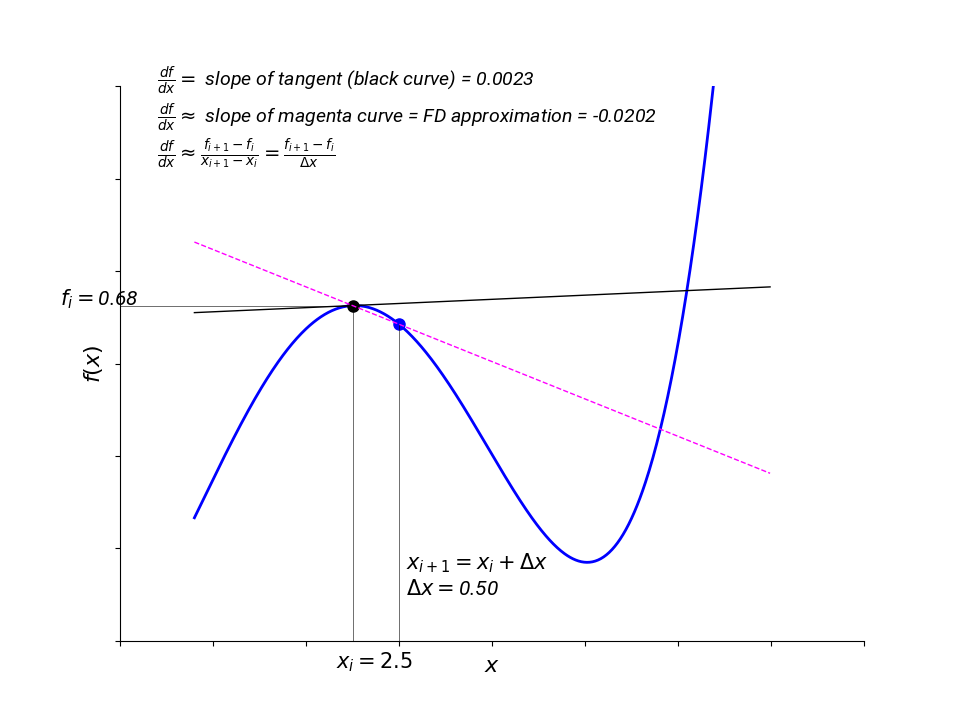

In [1]:

%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive
from IPython.display import display

plt.rcParams['figure.figsize'] = [9.6, 7.2]

fs = 16
ls = 16
lw = 2

# Function f
def f(x):
    return 0.5 + 0.046*x + 0.07*x**2 - 0.032*x**3 + 0.0033*x**4

# Derivative of function f
def dfdx(x):
    return 0.046 + 0.14*x - 0.096*x**2 + 0.0132*x**3

# New matplotlib figure
fig, ax = plt.subplots()

# Arrays for plotting function f
xnew = np.arange(0.8, 7, 0.01)
ynew = f(xnew)

# Plot update function for interactive widget
def plot_update(mthd, xi=2.5, dx=0.5):
    ax.clear()  
    ax.plot(xnew, ynew, 'blue', lw=lw)

    # Decorate the plot
    ax.set_xlabel('$\it{x}$', fontsize=fs)
    ax.set_ylabel('$f(x)$', fontsize=fs)
    ax.set_xlim(0, 8)
    ax.set_ylim(0.5, 0.8)
    #ax.tick_params(axis='both', labelsize=ls)
    ax.get_xaxis().set_ticklabels([])
    ax.get_yaxis().set_ticklabels([])
    for pos in ['top', 'right']:
        ax.spines[pos].set_visible(False)

    # Dynamic part
    ui = f(xi)
    uib = f(xi-dx)
    uif = f(xi+dx)
    ax.plot([xi],[ui], 'black', linestyle='None', marker='o', markersize=8)
    ax.plot([-10,xi], [ui, ui], 'black', lw=0.2*lw)
    ax.plot([xi,xi], [-10, ui], 'black', lw=0.2*lw)

    if mthd != 'Forward':
        ax.plot([xi - dx], [uib], 'red', linestyle='None', marker='o', markersize=8)
        ax.text(xi-dx-1., 0.525, r'$x_i - \Delta x = x_{i-1}$' + '\n' + r'$\Delta x = $' + f'{dx:.2f}', style='italic', fontsize=15)
        ax.plot([xi-dx,xi-dx],[-10, uib], 'black', lw=0.2*lw)
  
    if mthd != 'Backward':
        ax.plot([xi+dx], [uif], 'blue', linestyle='None', marker='o', markersize=8)
        ax.text(xi+dx+0.07, 0.525, r'$x_{i+1} = x_i + \Delta x$' + '\n' + r'$\Delta x = $' + f'{dx:.2f}', style='italic', fontsize=15)
        ax.plot([xi+dx,xi+dx],[-10, uif], 'black', lw=0.2*lw)
    
    ax.text(xi-0.18, 0.485, f'$x_i = {xi}$', style='italic', fontsize=15)#, bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10})
    ax.text(-0.65, ui, '$f_i = $'+ f'{ui:.2f}', style='italic', fontsize=15)
    #ax.arrow(xi, 0.55, dx, 0, width=0.01*dx)
    #ax.annotate('$x_i = $' + str(xi), xy=(xi, ui), xytext=(1, 0.77))
              #arrowprops=dict(facecolor='black', shrink=0.05),)

    # Tangent
    yTgnt = dfdx(xi)*(xnew-xi) + ui
    ax.plot(xnew, yTgnt, 'black', lw=0.5*lw)

    # Approximation
    m = (uif - ui)/dx
    text = r'$ \frac{df}{dx} \approx \frac{f_{i+1} - f_i}{x_{i+1} - x_i} = \frac{f_{i+1} - f_i}{\Delta x}$'
    if mthd == 'Backward':
        m = (ui - uib)/dx
        text = r'$ \frac{df}{dx} \approx \frac{f_{i} - f_{i-1}}{x_{i} - x_{i-1}} = \frac{f_{i} - f_{i-1}}{\Delta x}$'
    elif mthd == 'Central':
        m = (uif - uib)/dx/2
        text = r'$ \frac{df}{dx} \approx \frac{f_{i+1} - f_{i-1}}{x_{i+1} - x_{i-1}} = \frac{f_{i+1} - f_{i-1}}{2 \Delta x}$'
    yApprx = m*(xnew - xi) + ui
    fsText = 14
    ax.plot(xnew, yApprx, 'magenta', linestyle='dashed', lw=0.5*lw)
    ax.text(0.4, 0.76, text, style='italic', fontsize=fsText)
    ax.text(0.4, 0.78, r'$\frac{df}{dx} \approx $' + f' slope of magenta curve = FD approximation = {m:.4f}', style='italic', fontsize=fsText)
    ax.text(0.4, 0.80, r'$\frac{df}{dx} = $' + f' slope of tangent (black curve) = {dfdx(xi):.4f}', style='italic', fontsize=fsText)

    #fig.canvas.draw_idle()
    #plt.show()

# Widget for interactive plotting
interactive_plot = interactive(plot_update, mthd=['Forward','Backward', 'Central'],
                                            xi=(0.5, 7, 0.1),
                                            dx=(0.01, 0.8, 0.02))
output = interactive_plot.children[-1]
interactive_plot.children[0].description = 'FD Scheme'
#interactive_plot.children[1].description = r'$ \Delta x$'
#interactive_plot.children[1].value = 2.5
#interactive_plot.children[2].value = 0.5
#output.layout.height = '300px'

display(interactive_plot)


## Derivation from Taylor Series Expansions

- FD approximations have their basis in Taylor's series expansion of $f(x)$
<br>

$$ f(x) = f(a) + \frac{df}{dx}\Bigr|_{x=a}(x-a) + \frac{d^2f}{dx^2}\Bigr|_{x=a}\frac{(x-a)^2}{2!}+ \cdots +\frac{d^nf}{dx^n}\Bigr|_{x=a}\frac{(x-a)^n}{n!} + \cdots $$

- Which generalizes to:

$$ f(x) = \sum_{n=0}^{\infty} f^{(n)}(a) \frac{(x-a)^n}{n!}$$

- Here:

$$ f^{(0)}(a) = f(a) $$


$$ f^{(n)}(a) = \frac{d^n f}{dx^n} \Bigr|_{x=a} $$

- Forward differencing

$$  f(x_{i+1}) = \sum_{n=0}^{\infty} f^{(n)}(x_i) \frac{(\Delta x)^n}{n!} $$

$$  f(x_{i+1}) = f(x_i) + f'(x_i)\Delta x + \sum_{n=2}^{\infty} f^{(n)}(x_i) \frac{(\Delta x)^n}{n!} $$

- Rearranging

$$  f'(x_{i}) = \frac{f(x_{i+1}) - f(x_i)}{\Delta x} \color{red}{- \sum_{n=2}^{\infty} f^{(n)}(x_i) \frac{(\Delta x)^{n-1}}{n!}} $$

- Forward diferencing truncation error = $O(\Delta x)$

- Backward differencing

$$  f(x_{i-1}) = \sum_{n=0}^{\infty} f^{(n)}(x_i) \frac{(-\Delta x)^n}{n!} $$

$$  f(x_{i-1}) = f(x_i) - f'(x_i)\Delta x + \sum_{n=2}^{\infty} f^{(n)}(x_i) \frac{(-\Delta x)^n}{n!} $$

- Rearranging

$$  f'(x_{i}) = \frac{f(x_{i}) - f(x_{i-1})}{\Delta x} \color{red}{- \sum_{n=2}^{\infty} f^{(n)}(x_i) \frac{(-\Delta x)^{n-1}}{n!}} $$

- Backward diferencing truncation error = $O(\Delta x)$

- Central differencing (combining forward and backward schemes)

$$  f(x_{i+1}) - f(x_{i-1}) = 2\sum_{n=1,3,5,\cdots}^{\infty} f^{(n)}(x_i) \frac{(\Delta x)^n}{n!} $$

- Rearranging

$$  f'(x_{i}) = \frac{f(x_{i+1}) - f(x_{i-1})}{2\Delta x} \color{red}{ - \sum_{n=3,5,\cdots}^{\infty} f^{(n)}(x_i) \frac{(\Delta x)^{n-1}}{n!}} $$

- Central diferencing truncation error = $O(\Delta x)^2$
- Central differencing is more accurate than forward and backward differencing when $|\Delta x| < 1$

## Python Implementation

- Numerical derivative of $f(x) = cos(x)$
    - Exact derivative is $f^\prime(x) = -sin(x)$

In [2]:

import numpy as np

#step size
dx = 0.1*np.pi
x = np.arange(0, 4*np.pi + 0.001, dx) # Add a small number to include the end value too

# Exact derivative
dfdx_exact = -np.sin(x)


In [3]:

# Forward difference approximation - non-numpy
f = np.cos(x)
dfdx_fd = [] 
for i in range(0,len(x)-1):
    dfdx_fd.append((f[i+1] - f[i])/(dx))


- Visualize the `ndarray` as a table:

$$
\begin{array}{|c|c|c|c|c|c|c|c|c|c|c|c|c|}
    \hline
    x_0 & x_1 & x_2 & x_3 & \cdots & x_{i-1} & x_{i} & x_{i+1} & \cdots & x_{n-3} & x_{n-2} & x_{n-1} & x_{n} \\ \hline
    f_0 & f_1 & f_2 & f_3 & \cdots & f_{i-1} & f_{i} & f_{i+1} & \cdots & f_{n-3} & f_{n-2} & f_{n-1} & f_{n} \\ \hline
\end{array}
$$

<span style="font-size:25px;">
    $$
    \begin{array}{|c|c|c|c|c|c|c|c|c|c|c|c|c|}
        \hline
        x_0 & x_1 & x_2 & x_3 & \cdots & x_{i-1} & x_{i} & x_{i+1} & \cdots & x_{n-3} & x_{n-2} & x_{n-1} & x_{n} \\ \hline
        f_0 & f_1 & f_2 & f_3 & \cdots & f_{i-1} & f_{i} & f_{i+1} & \cdots & f_{n-3} & f_{n-2} & f_{n-1} & f_{n} \\ \hline
    \end{array}
    $$
</span>

- The finite difference approximations can be computed by taking difference of sub-arrays of these arrays
- For example, consider forward difference approximation:


$$ \frac{df}{dx} \approx \frac{f_{i+1} - f_i}{x_{i+1} - x_i} $$

- Then the numerator for points $(x_0, x_1, \cdots, x_{n-1})$ is:

    $$
    \begin{array}{|c|c|c|c|c|c|c|c|c|c|c|c|c|}
        \hline
        f_1 & f_2 & f_3 & \cdots & f_{i-1} & f_{i} & f_{i+1} & \cdots & f_{n-2} & f_{n-1} & f_{n} \\ \hline
    \end{array} \\
    - \\
    \begin{array}{|c|c|c|c|c|c|c|c|c|c|c|c|c|}
        \hline
        f_0 & f_1 & f_2 & \cdots & f_{i-2} & f_{i-1} & f_{i} & \cdots & f_{n-3} & f_{n-2} & f_{n-1} \\ \hline
    \end{array}
    $$

<span style="font-size:25px;">
    $$
    \begin{array}{|c|c|c|c|c|c|c|c|c|c|c|c|c|}
        \hline
        f_1 & f_2 & f_3 & \cdots & f_{i-1} & f_{i} & f_{i+1} & \cdots & f_{n-2} & f_{n-1} & f_{n} \\ \hline
    \end{array} \\
    - \\
    \begin{array}{|c|c|c|c|c|c|c|c|c|c|c|c|c|}
        \hline
        f_0 & f_1 & f_2 & \cdots & f_{i-2} & f_{i-1} & f_{i} & \cdots & f_{n-3} & f_{n-2} & f_{n-1} \\ \hline
    \end{array}
    $$
</span>

- _Note:_ Forward difference approximation cannot be computed at $x = x_{n}$, no $x_{n+1}$ available
- The denominator can be computed likewise if the discretization is not uniform

- Programatically this is:

In [4]:

# Forward difference approximation - numpy way
dfdx_fwd = (f[1:] - f[0:-1])/dx


In [5]:

# Central difference approximation - numpy way
dfdx_cen = (f[2:] - f[0:-2])/2/dx


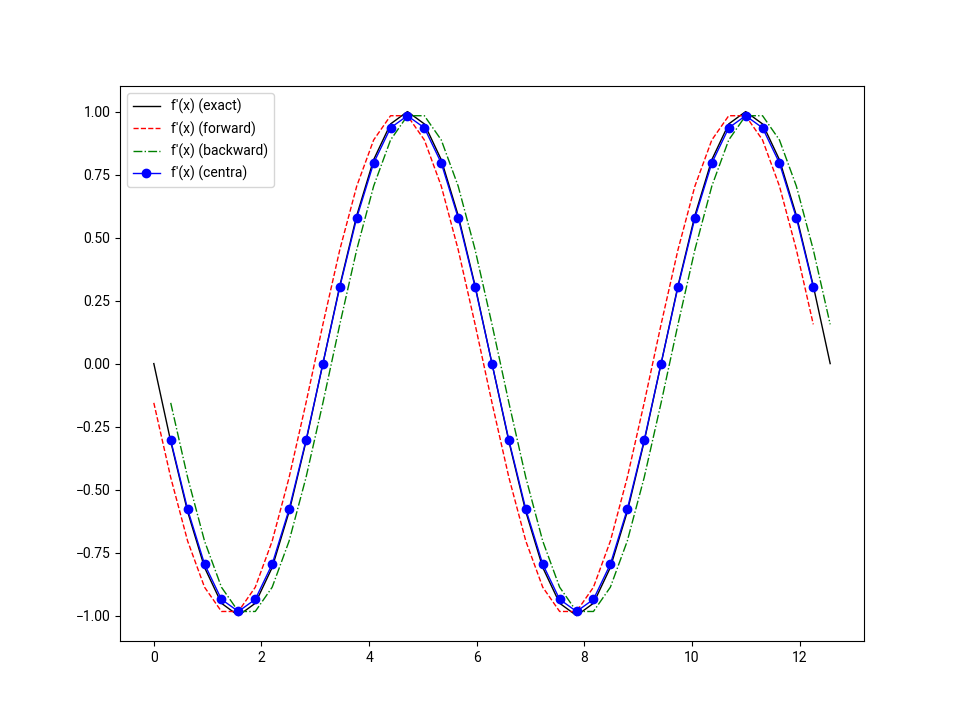

In [6]:

fig, ax = plt.subplots()
ax.plot(x, -np.sin(x), '-k', label="f'(x) (exact)")
ax.plot(x[0: -1], dfdx_fwd, '--r', label="f'(x) (forward)")
ax.plot(x[1:   ], dfdx_fwd, '-.g', label="f'(x) (backward)")
ax.plot(x[1: -1], dfdx_cen, '-ob', label="f'(x) (centra)")

ax.legend()


In [7]:

# Define the function to differentiate
def f(x):
    return np.sin(x)

# Define the analytical derivative of the function
def f_prime(x):
    return np.cos(x)

# Define the forward difference numerical differentiation scheme
def forward_diff(f, x, h):
    return (f(x + h) - f(x)) / h

# Define the backward difference numerical differentiation scheme
def backward_diff(f, x, h):
    return (f(x) - f(x - h)) / h

# Define the central difference numerical differentiation scheme
def central_diff(f, x, h):
    return (f(x + h) - f(x - h)) / (2*h)

# Define the range of x values to plot
x = np.linspace(0, 2*np.pi, 1000)

# Define the initial step size for differentiation
h0 = 0.1

# Define the interactive function that generates the plot
def plot_diff(h=0.5):
    # Calculate the derivatives using each scheme
    df_forward = forward_diff(f, x, h)
    df_backward = backward_diff(f, x, h)
    df_central = central_diff(f, x, h)

    # Plot the original function and its derivatives
    plt.figure(figsize=(8, 6))
    #plt.plot(x, f(x), label='f(x)')
    plt.plot(x, f_prime(x), '-k', label="f'(x) (exact)")
    plt.plot(x, df_forward, '--r', label="f'(x) (forward)")
    plt.plot(x, df_backward, '--g', label="f'(x) (backward)")
    plt.plot(x, df_central, ':b', label="f'(x) (central)")
    plt.legend()
    plt.title("Numerical differentiation schemes")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()

# Create the interactive plot
interactive_plot = interactive(plot_diff, h=(0.01, 1.1, 0.1))
interactive_plot


interactive(children=(FloatSlider(value=0.5, description='h', max=1.1, min=0.01), Output()), _dom_classes=('wi…

## Second Derivatives

- Finite difference approximation of 2nd derivative $f''(x)$

$$ f''(x) = \frac{d}{dx}\left(f'(x)\right) $$

- Derivative of the derivative; use any of the 1st order approximations

- If using central difference:
<br>

$$ 
\begin{align*}
    f''(x_i) &\approx \frac{f'(x_{i + 1/2}) - f'(x_{i - 1/2})}{\Delta x} \\
             &= \frac{1}{\Delta x}\left(  \frac{f_{i+1}-f_i}{\Delta x} - \frac{f_i - f_{i-1}}{\Delta x}\right) \\
             &= \frac{f_{i+1} - 2f_i + f_{i-1}}{\Delta x^2}
\end{align*}
$$

- Other higher accuary approximation and for higher order derivatives can be obtained from the Taylor series approximation

- Example: a higher accuracy ($O(\Delta x^4)$) FD approximation for the 2nd derivative $f''(x)$
<br>

$$  \frac{d^2f}{dx^2} = \frac{-f_{i+2} + 16f_{i+1} - 30 f_i + 16f_{i-1} - f_{i-2}}{12\Delta x^2} + O(\Delta x^4)$$

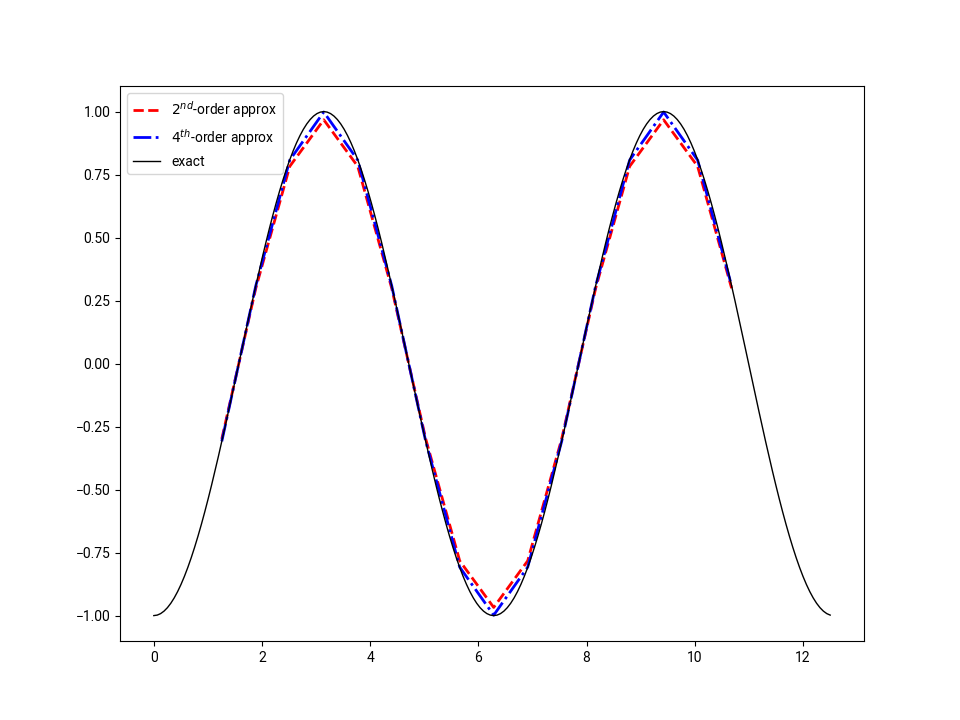

In [8]:

dx = 0.2*np.pi
x = np.arange(0,4*np.pi, dx)
f = np.cos(x)

d2f_3pt = []
d2f_5pt = []
for i in range(2,len(x)-2):
    d2f_3pt.append((f[i+1] - 2*f[i] + f[i-1])/dx**2)
    d2f_5pt.append((-f[i+2] + 16*f[i+1] - 30*f[i] + 16*f[i-1] - f[i-2])/(12*dx**2))

fig, ax = plt.subplots()
ax.plot(x[2:-2], d2f_3pt, '--r', label='$2^{nd}$-order approx', lw=2)
ax.plot(x[2:-2], d2f_5pt, '-.b', label='$4^{th}$-order approx', lw=2)
x = np.arange(0,4*np.pi, dx/10)
ax.plot(x, -np.cos(x), '-k', label = 'exact')
ax.legend();


## Procedure for FD Approximations

- Procedure for FD approximation of $f^{(n)}(x_i)$:
    - Write the approximation for $f^{(n)}(x_i)$ as a linear combination of $\cdots, f(x_{i-2}), f(x_{i-1}), f(x_i), f(x_{i+1}), f(x_{i+2}), \cdots$
        - The number of points used determines the accuracy of the approximation, but requires more function evaluations
        - If using $2 p + 1$ points with $p$ points on either side of $x_i$:

$$
\begin{aligned}
    f^{(n)}(x_i) &= a_0 f(x_i) + a_{-1} f(x_{i-1}) + \cdots + a_{-p} f(x_{i-p}) + \\
                 &\qquad\qquad\quad a_{1} f(x_{i+1}) + \cdots + a_{p} f(x_{i+p}) \\
                 &= \sum_{j=-p}^{j=p} a_j f(x_{i+j})
\end{aligned}
$$

<ul style="list-style-type:none;">
  <li>
    <ul>
      <li>Here, as before, $x_{i+j} = x_i + j \Delta x$ and $a_j$ are coefficients to be determined</li>
    </ul>
  </li>
</ul>

<ul style="list-style-type:none;">
    <li>
        <ul>
            <li>Use Taylor series about $x=x_i$ to expand all the terms on RHS</li>
            <li>Collect the terms and choose $a_j$ such that the coefficients of:</li>
            <ul>
                <li>the lower order derivative terms (i.e., $f^{(n-1)}(x_i), f^{(n-2)}(x_i),\cdots,f^{(1)}(x_i), f(x_i)$) all vanish</li>
                <li>$f^{(n)}(x_i)$ is 1</li>
                <li>The remaining higher order terms form the truncation error
            </ul>
        </ul>
    </li>
</ul>

- Example: FD approximation for $f^{(2)}(x_i)$ using 3 points

$$
\begin{aligned}
    f^{(2)}(x_i) &\approx a_{-1} f(x_{i-1}) + a_0 f(x_i) + a_{1} f(x_{i+1}) \\
                 &= (a_{-1} + a_0 + a_1) f(x_i) + a_{-1} \sum_{n=1}^\infty \frac{(-\Delta x)^n}{n!} f^{(n)}(x_i) + a_{1} \sum_{n=1}^\infty \frac{(\Delta x)^n}{n!} f^{(n)}(x_i)
\end{aligned}
$$

- Coefficient of $f^{(n)}(x_i)$ is:
    - If $n$ is odd: $(a_1 - a_{-1}) \frac{(\Delta x)^n}{n!}$
    - If $n$ is even: $(a_1 + a_{-1}) \frac{(\Delta x)^n}{n!}$

- The coefficient of $f^{(1)}(x_i)$ must vanish $\implies a_1 = a_{-1}$

- The coefficient of $f(x_i)$ must vanish $\implies a_0 = -2 a_1$

- The coefficient of $f^{(2)}(x_i)$ must vanish too $\implies 2 a_1 \frac{\Delta x^2}{2!} - 1 = 0$
    - Solving the equation gives $a_1 = 1/(\Delta x)^2$

- Thus the FD approximation of $f^{(2)}(x_i)$ with 3 points is:

$$
    f^{(2)}(x_i) \approx \frac{f(x_{i-1}) - 2 f(x_i) + 2 f(x_{i+1})}{\Delta x^2}
$$

- The truncation error is $O(\Delta x^2)$ and given by:

$$
2 \sum_{m=4,6,\cdots}^\infty \frac{(\Delta x)^{m-2}}{m!} f^{(m)}(x_i)
$$

## Reading Material

- https://pythonnumericalmethods.berkeley.edu/notebooks/chapter20.01-Numerical-Differentiation-Problem-Statement.html
- https://hplgit.github.io/fdm-book/doc/web/index.html